### Programation d'un neurone artificiel pour faire la différence entre un chat et un chien

#### Import des librarys

In [348]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

from  utilities import load_data

#### Initialisation du dataset

In [349]:
#import des images
X_train, y_train, X_test, y_test = load_data()
print("X_train shape : ", X_train.shape, "\ny_train shape : ", y_train.shape, "\nX_test shape : ", X_test.shape, "\ny_test shape : ", y_test.shape)


#normalisation entre 0 et 1

#fonction qui retourne une matrice normalisé entre 0 et 1
#@params X, matrice à normaliser
#@params seuil, seuil de normalisation
def normalisationMatriciel(X):

    X=X/255
    return X

X_train = normalisationMatriciel(X_train)
X_test = normalisationMatriciel(X_test)
print(type(X_train))

X_train shape :  (1000, 64, 64) 
y_train shape :  (1000, 1) 
X_test shape :  (200, 64, 64) 
y_test shape :  (200, 1)
<class 'numpy.ndarray'>


In [350]:
#fonction pour transformer un datasets qui en en 2d en 1 d
#@params X, datasets à redimensionner
def flatDataSet(X): 
    X2= np.ndarray(shape=(X.shape[0],X.shape[1]*X.shape[2]), dtype=float)
    
    for i in range(X.shape[0]):
        X2[i] = X[i].flatten()
    
    return X2
#note on aurait pu juste faire X.reshape=X.reshape(X.shape[0],-1) 
#car -1 va reorganiser avec ce qu'il reste automatiquement sur une seule dimension

In [351]:

X_train = flatDataSet(X_train)
X_test = flatDataSet(X_test)



In [352]:
print(X_train.shape)

(1000, 4096)


#### Fonction d'initialisation

In [353]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)

#### Model

In [354]:
def model(X,W,b):
    Z = X.dot(W) + b
    A = 1/(1+ np.exp(-Z))
    return A

#### Fonction coût/Log Loss

In [355]:
#def log_loss(A,y):
    #return (1/len(y))*np.sum(-y*np.log(A) - (1 - y)* np.log(1-A))
#on a appelera la fonction de sklearn plutot

#### Gradients

In [356]:
def gradients(A,X,y):
    dW = (1/len(y))*np.dot(X.T, A - y)
    db = (1/len(y))* np.sum( A - y)
    return (dW, db)

#### Update des poids

In [357]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return (W,b)

#### Fonction de prediction

In [358]:
def predict(X,W,b):
    A = model(X,W,b)
    return A>=0.5

#### Algorithme de descente de gradient

In [359]:
def artificial_network(X_train,y_train,X_test,y_test,learning_rate=0.1,n_iter = 100):
    #initialisation des coefficients
    W, b = initialisation(X_train)
    Loss_history_train = []
    accuracy_history_train = []

    Loss_history_test = []
    accuracy_history_test = []
    for i in tqdm(range(n_iter)):
        
        A = model(X_train,W,b)
        if i % 10 ==0:
            #Train
            Loss_history_train.append(log_loss(y_train,A))
            y_pred = predict(X_train,W,b)
            accuracy_history_train.append(accuracy_score(y_train,y_pred))

            #Test
            A_test = model(X_test,W,b)
            Loss_history_test.append(log_loss(y_test,A_test))
            y_pred = predict(X_test,W,b)
            accuracy_history_test.append(accuracy_score(y_test,y_pred))

        dW,db = gradients(A,X_train,y_train)
        W, b = update(dW, db, W, b, learning_rate)
    
    

    print(accuracy_history_test==accuracy_history_train)
    #graphique
    plt.figure(figsize=(12,8))
    plt.subplot(2,2,1)
    plt.plot(Loss_history_train,label="Train Loss")
    plt.plot(Loss_history_test,label="Test Loss")
    plt.legend()

    plt.subplot(2,2,2)
    plt.plot(accuracy_history_train,label="Train Accuracy")
    plt.plot(accuracy_history_test,label="Test Accuracy")
    plt.legend()
    plt.show() # affiche la figure a l'ecran
    return W, b

#### Test

100%|██████████| 600/600 [00:04<00:00, 132.86it/s]


False


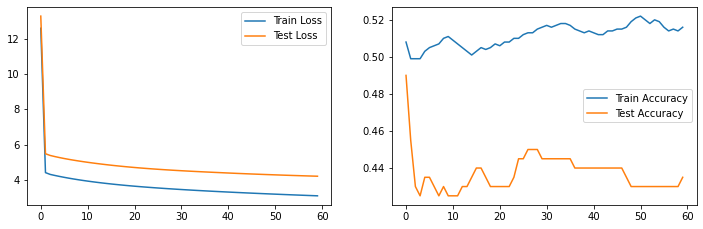

In [360]:
W,b = artificial_network(X_train,y_train,X_test,y_test,0.01,600)

#### Mise en production

In [361]:

for i in range(100):
    print(y_test[i], " :",predict(X_test[i],W,b))



[1.]  : [ True]
[0.]  : [ True]
[1.]  : [ True]
[0.]  : [ True]
[1.]  : [ True]
[1.]  : [ True]
[0.]  : [ True]
[1.]  : [ True]
[0.]  : [ True]
[1.]  : [False]
[0.]  : [ True]
[0.]  : [False]
[1.]  : [False]
[0.]  : [False]
[1.]  : [False]
[1.]  : [False]
[0.]  : [False]
[0.]  : [False]
[1.]  : [ True]
[0.]  : [False]
[1.]  : [ True]
[1.]  : [ True]
[0.]  : [False]
[0.]  : [False]
[0.]  : [ True]
[1.]  : [False]
[0.]  : [False]
[1.]  : [ True]
[1.]  : [False]
[1.]  : [ True]
[0.]  : [False]
[1.]  : [False]
[1.]  : [False]
[0.]  : [ True]
[1.]  : [ True]
[1.]  : [ True]
[0.]  : [False]
[0.]  : [False]
[0.]  : [ True]
[1.]  : [False]
[0.]  : [ True]
[0.]  : [False]
[1.]  : [False]
[1.]  : [False]
[0.]  : [False]
[0.]  : [ True]
[1.]  : [False]
[1.]  : [False]
[1.]  : [False]
[1.]  : [False]
[1.]  : [False]
[1.]  : [ True]
[0.]  : [ True]
[1.]  : [False]
[0.]  : [ True]
[0.]  : [False]
[0.]  : [ True]
[1.]  : [ True]
[0.]  : [ True]
[1.]  : [False]
[0.]  : [ True]
[1.]  : [False]
[0.]  : 